7. Perform Feature Engineering towards building new feature which is more impactful. Build machine learning
model/s to predict the price of the car based on other given features like Brand, Model, Year, Fuel Type etc

   Car_ID    Brand    Model  Year  Kilometers_Driven Fuel_Type Transmission  \
0       1   Toyota  Corolla  2018              50000    Petrol       Manual   
1       2    Honda    Civic  2019              40000    Petrol    Automatic   
2       3     Ford  Mustang  2017              20000    Petrol    Automatic   
3       4   Maruti    Swift  2020              30000    Diesel       Manual   
4       5  Hyundai   Sonata  2016              60000    Diesel    Automatic   

  Owner_Type  Mileage  Engine  Power  Seats    Price  
0      First       15    1498    108      5   800000  
1     Second       17    1597    140      5  1000000  
2      First       10    4951    395      4  2500000  
3      Third       23    1248     74      5   600000  
4     Second       18    1999    194      5   850000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----

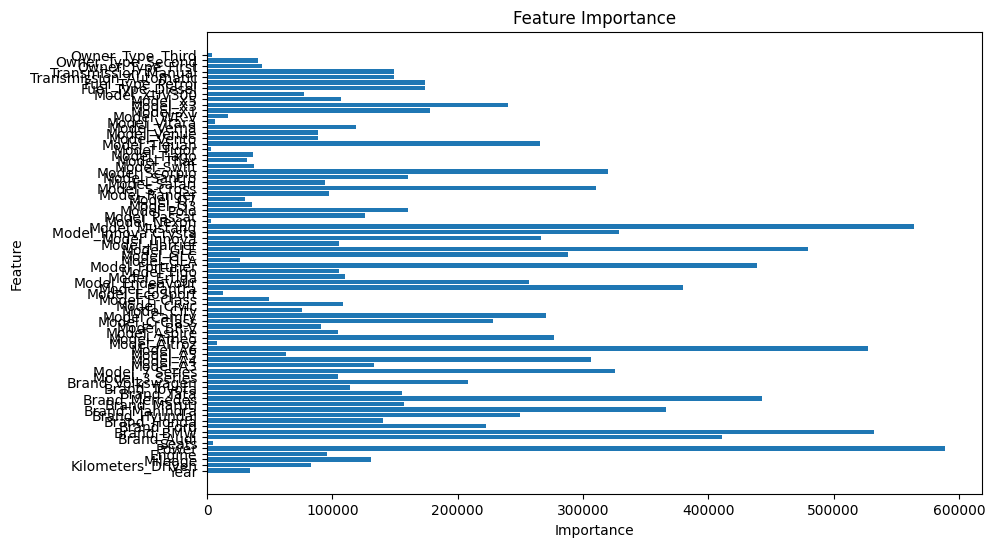

In [ ]:
# Load your dataset here. Replace 'your_dataset.csv' with the path to your file.
import pandas as pd
data = pd.read_csv('/content/cars.csv')
# Step 1: Display first few rows of the dataset
print(data.head())
# Step 2: Show dataset after cleaning and feature engineering
print(data.info())
print(data.describe())
# Step 3: After Train-Test split, check shapes
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
# Step 4: Model Training Output
pipeline.fit(X_train, y_train)
print("Pipeline trained successfully!")
# Step 5: Training Performance
y_train_pred = pipeline.predict(X_train)
print("Training R-squared:", r2_score(y_train, y_train_pred))
print("Training Mean Absolute Error:", mean_absolute_error(y_train, y_train_pred))
# Step 6: Testing Performance
y_test_pred = pipeline.predict(X_test)
print("Test R-squared:", r2_score(y_test, y_test_pred))
print("Test Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred))
# Step 7: Feature Importance Visualization

# Get feature names after preprocessing
# This part gets the feature names generated by the one-hot encoder
onehot_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
# Combine numerical and one-hot encoded feature names
feature_names = numerical_features + list(onehot_features)

# Get importances from the trained model
regressor = pipeline.named_steps['regressor']
if hasattr(regressor, 'feature_importances_'):
    importances = regressor.feature_importances_
elif hasattr(regressor, 'coef_'):
    importances = abs(regressor.coef_) # Use absolute values of coefficients for linear models
else:
    print("Regressor does not have feature_importances_ or coef_ attribute.")
    importances = None

if importances is not None:
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, importances)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.show()
else:
    print("Could not determine feature importances for the selected regressor.")